# San Francisco Crime Classification
--------------------------------

# Exploring the data
## 1. Loading the data files

In [2]:
# import pandas
import pandas as pd

# load train and test as dataframes
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")

## 2. Showing data

In [3]:
# import display function from ipython
from IPython.display import display, HTML

# display the first rows of each dataset
display(train_df.head())
print "train shape: {}".format(train_df.shape)
display(test_df.head())
print "test shape: {}".format(test_df.shape)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


train shape: (878049, 9)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


test shape: (884262, 7)


* As showing above, The test dataset doesn't contain 3 columns {Category, Descript, Resolution} as the category column is the target column to found in the test set.
* The test set will be used for testing only at the end of project
* Training data will be divided into training and testing -Validation- sets to train the models later.

## 3.Visualizing and preprocessing the data

Now, lets visualize location information

In [27]:
# lets see the statistics summary of locations
lons = train_df['X'] # longitudes 
lats = train_df['Y'] # latitudes

print "Longitudes summary:"
print lons.describe()
print "\nLatitudes summary:"
print lats.describe()

Longitudes summary:
count    878049.000000
mean       -122.422616
std           0.030354
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -120.500000
Name: X, dtype: float64

Latitudes summary:
count    878049.000000
mean         37.771020
std           0.456893
min          37.707879
25%          37.752427
50%          37.775421
75%          37.784369
max          90.000000
Name: Y, dtype: float64


-----------------------
We can conclude that:
* longitudes are between [-122.52, -120.5], each value different slightly from others
* latitudes are between [37.708, 90]
* here as shown there exist some bad values -i.e. close to 90-, the reasons that this is bad that 
    * first, san fransisco latitudes are between [37.707, 37.83269] , reference: [google maps](https://www.google.com.eg/maps/place/San+Francisco,+CA,+USA/@37.7407396,-122.4303937,12z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155)
    * second as shown in the statistics that the most values are close to 37.7
    * Also in longitudes, san fransisco longitudes are between [-122.517652, -122.3275], from google maps

Now, to demonstrate the locations, let's plot them using scatter plot

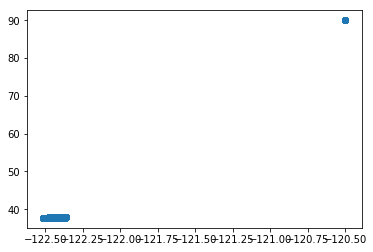

In [19]:
from collections import Counter
import matplotlib.pyplot as plt


plt.scatter(lons, lats)
plt.show()

This also shows the bad points that are close to 90 in latitudes and close to -120 longitudes so we will execlude these values

In [46]:
# eliminate rows with latitudes out of San Francisco range
train_df = train_df.drop(train_df[(train_df['Y'] > 37.84) | (train_df['Y'] < 37.7)].index)
# eliminate rows with longitudes out of San Francisco range
train_df = train_df.drop(train_df[((train_df['X'] > -122.32) | (train_df['X'] < -122.52))].index)
train_df.describe()

,X,Y
count,877982.000000,877982.000000
mean,-122.422763,37.767035
std,0.025285,0.024165
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784368
max,-122.364937,37.819975


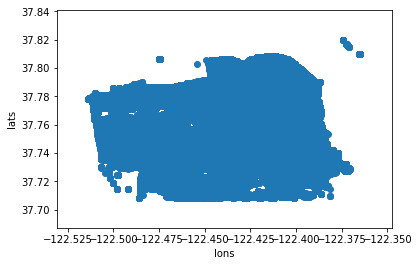

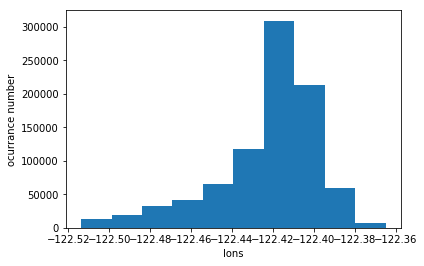

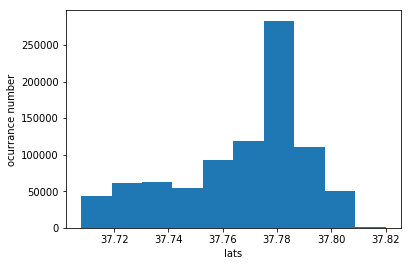

In [56]:
new_lons = train_df['X'] # longitudes 
new_lats = train_df['Y'] # latitudes

plt.scatter(new_lons, new_lats)
plt.xlabel('lons')
plt.ylabel('lats')
plt.show()
plt.hist(new_lons)
plt.xlabel('lons')
plt.ylabel('ocurrance number')
plt.show()
plt.hist(new_lats)
plt.xlabel('lats')
plt.ylabel('ocurrance number')
plt.show()

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


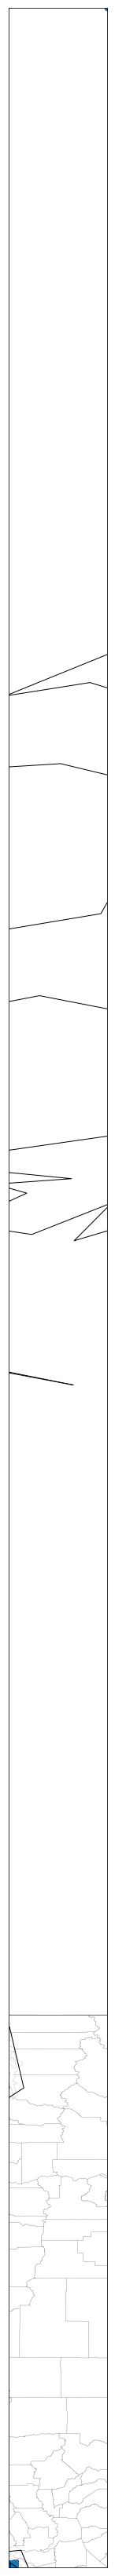

In [39]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(120,60))

# minimum and maximum longitude and latitude for map zooming
lon_min = min(train_df['X']) 
lon_max = max(train_df['X']) 
lat_min = min(train_df['Y']) 
lat_max = max(train_df['Y']) 

map = Basemap(
    llcrnrlon=lon_min,
    llcrnrlat=lat_min,
    urcrnrlon=lon_max,
    urcrnrlat=lat_max
)

map.drawcoastlines()
map.drawcounties()
map.drawcountries()

map.scatter(train_df['X'], train_df['Y'])
plt.show()

In [7]:
y.value_counts()

37.775421    26354
37.764221     4449
37.756486     3891
37.784189     3170
37.765050     3006
37.783386     2533
37.785063     2329
37.772541     2182
37.728528     2019
37.769247     1991
37.786565     1954
37.725693     1696
37.779514     1658
37.783215     1626
37.736444     1622
37.781751     1609
37.782231     1605
37.784697     1491
37.782793     1452
37.784914     1439
37.785094     1380
37.780478     1326
37.809671     1300
37.765718     1269
37.785023     1264
37.784866     1179
37.779834     1177
37.782843     1164
37.757158     1151
37.783992     1144
             ...  
37.765034        1
37.778050        1
37.745911        1
37.726854        1
37.736367        1
37.747507        1
37.721781        1
37.728684        1
37.755403        1
37.731817        1
37.777723        1
37.749207        1
37.778564        1
37.790325        1
37.781051        1
37.759219        1
37.709569        1
37.771415        1
37.793120        1
37.776959        1
37.761187        1
37.783588   